# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times m$, $V$ --- ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ --- диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times k$, $V$ --- ортогональная матрица размера $k\times n$, $\Sigma$ --- диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{(r)}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{(r)}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{(r)}$ - это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{ii}$ ($i > r$) нулями, тогда $A_{(r)} = U\Sigma_{(r)}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{11} & &\\
 & \sigma_{22} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{(r)} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{11} & &\\
 & \ddots & \\
 & & \sigma_{rr}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{ii}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{11}v_1^T + u_2\sigma_{22}v_2^T + u_3\sigma_{33}v_3^T + \ldots$$

Матрицу $u_k\sigma_{kk}v_k^T = \sigma_{kk}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{11}u_1v_1^T + \sigma_{22}u_2v_2^T + \ldots + \sigma_{rr}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем вам использовать

`import scipy.linalg.as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Обращаем ваше внимание на то, что `U, S, Vt` - это соответственно матрицы $U$, $\Sigma$ и $V^T$ (не забывайте про это $^T$). Параметр `full_matrices` отвечает за то, будет ли сингулярное разложение полным или усечённым. 

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [16]:
from PIL import Image
from scipy import misc
from numpy.linalg import svd
import numpy as np

In [17]:
img = misc.imread('Sonya_small.jpg', mode='L')

Нарисуйте картинку:

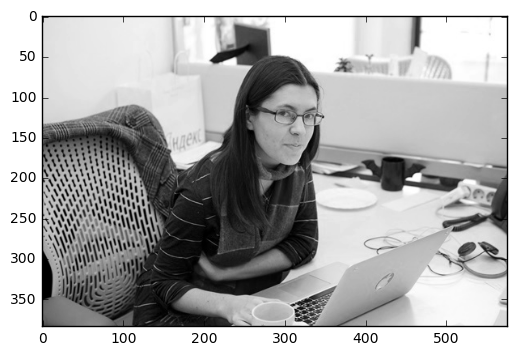

In [18]:
import pylab as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [19]:
U, S, VT = svd(img, full_matrices=False)

Нарисуйте график диагональных элементов матрицы $\Sigma$:

384


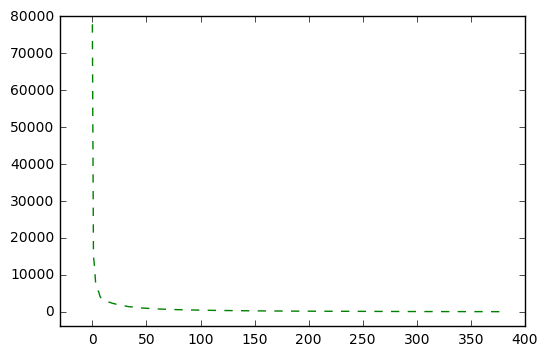

In [50]:
sigma = S
plt.ylim([-4000, 80000])
plt.xlim([-30, 400])
plt.plot(sigma, 'g--')
print(sigma.shape[0])

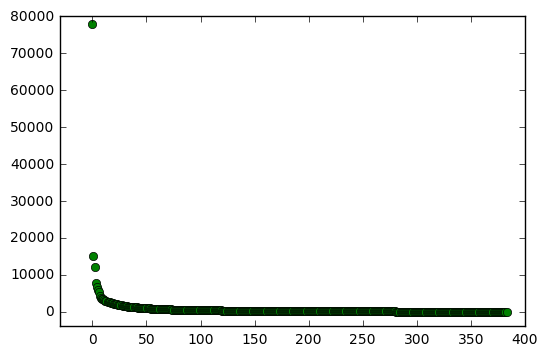

In [51]:
sigma = S
plt.ylim([-4000, 80000])
plt.xlim([-30, 400])
plt.plot(sigma, 'go')

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

Визуализуйте первую компоненту ранга 1. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

**Важно:** пожалуйста, сделайте это с помощью только матричных операций, без циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

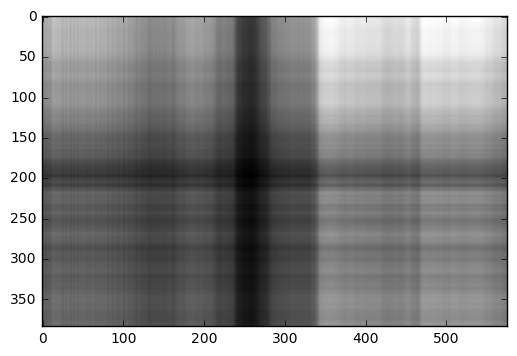

In [57]:
IMG_matrix = (sigma[:1] * U[:,:1]).dot(VT[:1,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

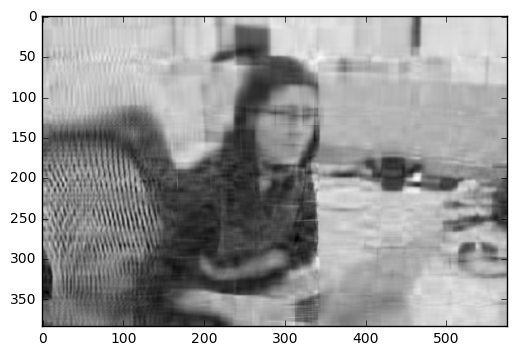

In [55]:
IMG_matrix = (sigma[:20] * U[:,:20]).dot(VT[:20,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

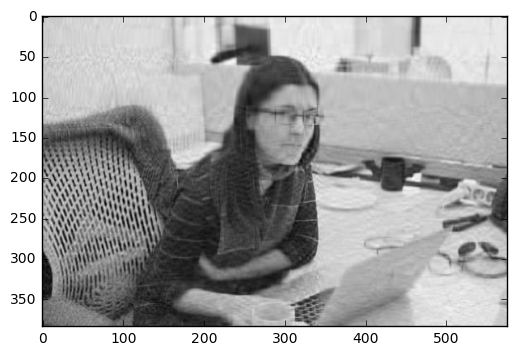

In [58]:
IMG_matrix = (sigma[:50] * U[:,:50]).dot(VT[:50,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

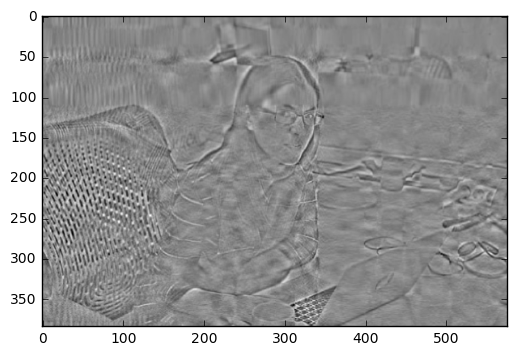

In [59]:
IMG_matrix = (sigma[20:100] * U[:,20:100]).dot(VT[20:100,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

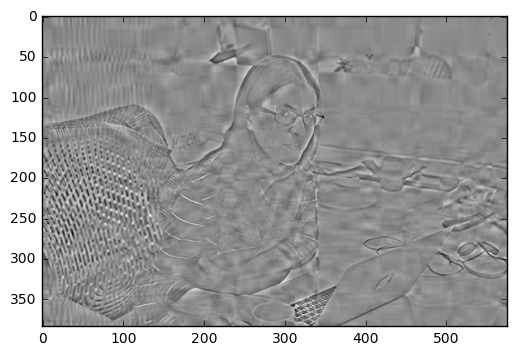

In [60]:
IMG_matrix = (sigma[20:] * U[:,20:]).dot(VT[20:,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

Так как первая первая компонента во много раз превосходит остальные, я ожилал с хорошей точностью совпадение данной картинки с исходной, но, на практике, получилось по-другому

Как вам кажется, сколько первых главных компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения?

Отметим, что если мы возьмем первые 100 компонент, то полученное нами изображение с хорошей степенью точности будет совпадать с исходным. В частности, это следует из того что на нашем графике после 100 элемента значение функии 

Размер уменьшился в $\dfrac{384\cdot576}{100\cdot(384+1+576)} = 2,3$

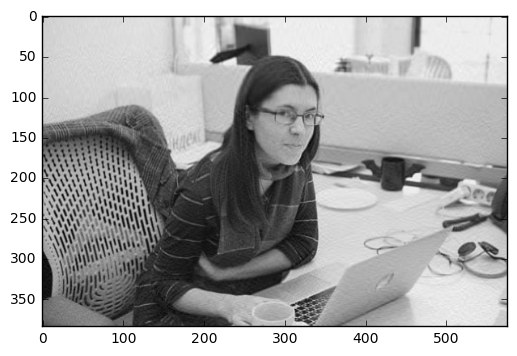

In [61]:
IMG_matrix = (sigma[:100] * U[:,:100]).dot(VT[:100,:])
IMG_plot= plt.imshow(IMG_matrix, cmap='gray')

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD.

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки - объекты, столбцы - признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma \cdot V^T,$$

где $U\Sigma$ - это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V^T$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = U\Sigma^2U^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $u_1$, первый столбец матрицы $U$, - это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right),$$

Попробуем осознать физический смысл этой шутки. Напомним, что строки матрицы $X$ - это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ - это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$

Соответственно, $|Xw|^2$ - это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

В задании 3.3 вы в этом убедитесь на конкретном примере.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ - среднее значения признака.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых признаков" - это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять две-три первых, то датасет можно нарисовать и посмотреть на него - и, возможно, обнаружить какую-то структуру.

**Задание 2.1.** С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого - это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


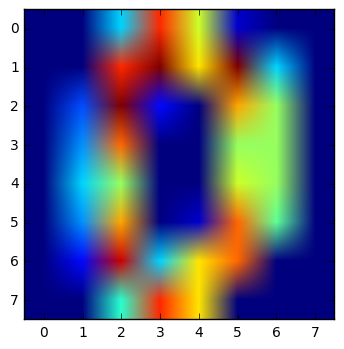

In [90]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

Примените к матрице `digits.target` сингулярное разложение.

Первые два столбца матрицы $U\Sigma$ - это проекция датасета на некоторую плоскость (объекты - это строки!). Нарисуйте на плоскости эти точки, покрасив различные цифры (0,1,2,...) в разные цвета. Получается ли какая-то структура?

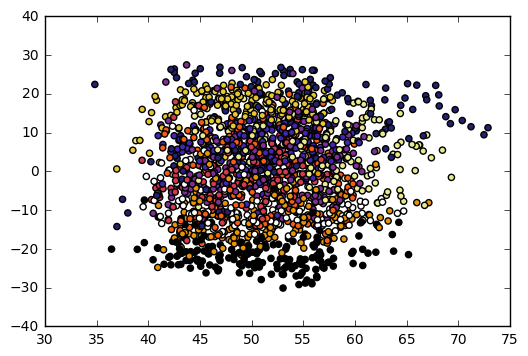

In [91]:
U, S, VT = svd(digits.data, full_matrices=True)

x = S[0] * U[:, 0]
y = S[1] * U[:, 1]
plt.scatter(x, y, c=digits.target, cmap="CMRmap", marker = '.')

Если вы всё сделали правильно, то никакой структуры не должно было получиться:)

А всё потому, что мы не сделали одной важной вещи (почему она важна - мы с вами увидим в конце третьего задания). Теперь вычтите из каждого признака (т.е. из каждого столбца) его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

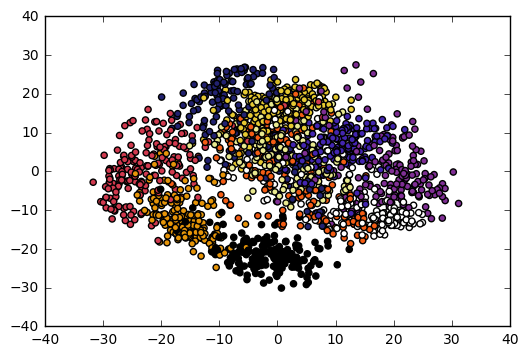

In [99]:
U, S, VT = svd(digits.data - digits.data.mean(axis=0), full_matrices=True)

x = S[0] * U[:, 0]
y = S[1] * U[:, 1]
plt.scatter(x, y, c=digits.target, cmap="CMRmap", marker = '.')

Теперь у вас должна была получиться красивая картинка!

**Задание 2.$\frac32^*$**. Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html). Задание со звёздочкой и не про линейную алгебру, поэтому ничего не объясняем.

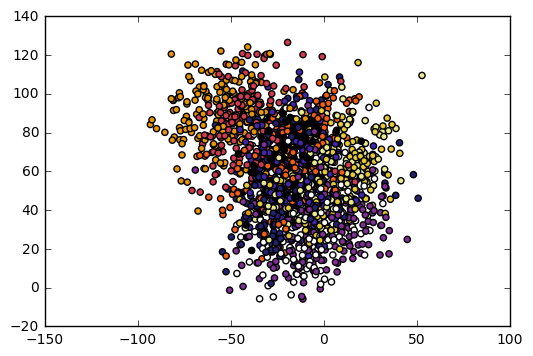

In [101]:
from sklearn import random_projection

Gauss = random_projection.GaussianRandomProjection(2).fit_transform(digits.data, digits.target)
colors = ['gray', 'brown', 'orange', 'y', 'c', 'g', 'b', 'm', 'r', 'k'];

plt.scatter(Gauss[:, 0], Gauss[:, 1], c=digits.target, cmap='CMRmap', marker = '.')

Видим, что работает одинаково плохо.

### Задание 3. Когда SVD не сработает.

**Disclaimer**

Цель этого задания - познакомить вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(2, 1)$ и $\mathcal{N}(2, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) --- `scale`.

In [105]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline

TypeError: 'float' object cannot be interpreted as an integer

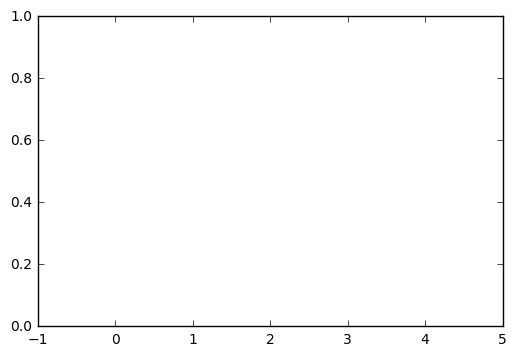

In [107]:
N = 10000
plt.xlim([-1,5])
s = np.random.normal(loc=2, scale=0.5, size=N) # generate your data sample with N elements
p, x = np.histogram(s, bins=N/100) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2 # convert bin edges to centers
f = UnivariateSpline(x, p, s=N)
plt.plot(x, f(x), label='N(0,0.25)')

s = np.random.normal(loc=2, scale=1, size=N) # generate your data sample with N elements
p, x = np.histogram(s, bins=N/100) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2 # convert bin edges to centers
f = UnivariateSpline(x, p, s=N)
plt.plot(x, f(x), label='N(0,1)')

s = np.random.normal(loc=2, scale=2, size=N) # generate your data sample with N elements
p, x = np.histogram(s, bins=N/100) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2 # convert bin edges to centers
f = UnivariateSpline(x, p, s=N)
plt.plot(x, f(x), label='N(0,4)')
plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ --- это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ --- вектор из $\mathbb{R}^n$. Компоненты вектора $a$ --- это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированы, однако для нормального распределения независимости и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Задание 3.1.** Докажите, что поверхности уровня $p(x) = c$ --- это эллипсоиды.

\begin{gather*}
    p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}=c_1 \Rightarrow
    (x - a)^T\Sigma^{-1}(x - a) = c_2
\end{gather*}

Так как матрица $ \Sigma $ является симметричной, диоганализуем ее:

\begin{gather*}
    \Sigma = H^{T} M H
\end{gather*}

Проделаем линейную замену:

\begin{gather*}
    z = (H^{-1})^{T}(x - a) 
\end{gather*}

Подставляя наши замены получаем:

\begin{gather*}
    (x - a)^T\Sigma^{-1}(x - a) = z^{T}Mz  = \Sigma_{i,j}z_ia^{-1}_{ij}z_j = \Sigma_{i}a^{-1}_{ii}z_i^2 = c_2 
\end{gather*}

Что в точности совпадает с уравнением эллипса. Здесь стоит отметить, что все $ a_{ii} \ge 0 $ в силу того, что $ \Sigma  $ положительно определена.

**Задание 3.2.** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

---

*Ваше доказательство*

А мы, тем временем, продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(0,0)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

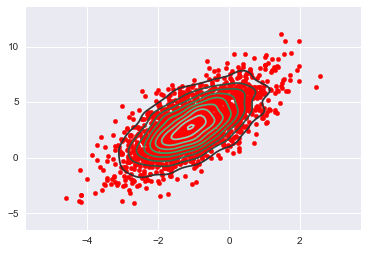

In [19]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**Так при чём тут SVD?!**

**Задание 3.3.** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}$$

Должна получиться матрица $X$ размера $1000\times2$. Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков (подсказка: они где-то в матрице $V^T$). Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

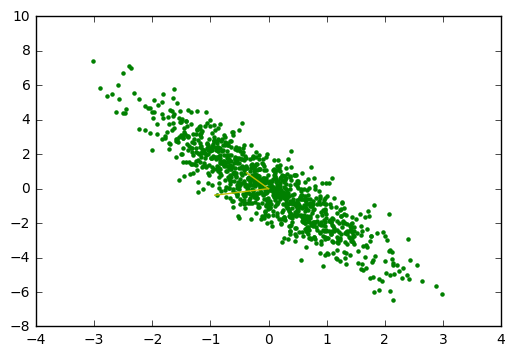

In [118]:
GRAPH = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=1000)
U, S, VT = svd(GRAPH, full_matrices=0)
plt.scatter(GRAPH[:,0], GRAPH[:,1], marker = '.', color='g')
plt.plot([0, VT.T[0,0]], [0, VT.T[1,0]], color='y')
plt.plot([0, VT.T[0,1]], [0, VT.T[1,1]], color='y')

Теперь приведите к главным осям матрицу ковариации и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Для начала найдем корни характеристического многочлена - собственные значения:
$$det\begin{pmatrix}
1 -\lambda& -2\\
-2 & 5-\lambda
\end{pmatrix} \quad \lambda = 3 - 2\sqrt{2} \quad \lambda = 3 + 2\sqrt{2} $$
Тогда нормированные собственные вектора:
$$v_1=\begin{pmatrix}\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}}\\\frac{1}{\sqrt{4+2\sqrt{2}}}\end{pmatrix};~~~~~~~~ v_2=\begin{pmatrix}\frac{-\sqrt{2}+1}{\sqrt{4-2\sqrt{2}}}\\\frac{1}{{\sqrt{4-2\sqrt{2}}}}\end{pmatrix}$$
Отметим, что данная матрица соответствует повороту $ \approx \frac{\pi}{8} $  

---

*Ваше решение*

**Когда SVD не работает**

Как вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**Задание 3.4.** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей (подсказка: просто возьмите одинаковые ковариационные матрицы). Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

Сделайте SVD и нарисуйте направления новых признаков.

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса). Убедитесь, что ни один из предоставленных SVD признаков не помогает обнаружить эту структуру.

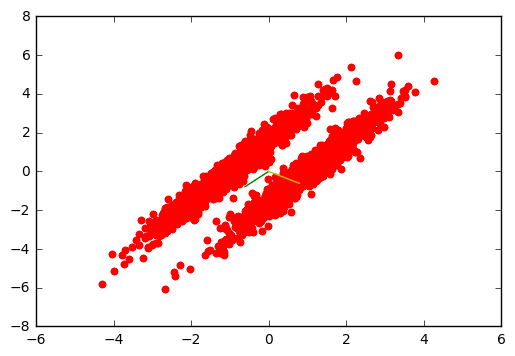

In [123]:
mat =[[1.198, 1.898], [1.732, 2.912]]
x = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array(mat), size=1100)
y = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array(mat), size=1100)
g = np.vstack((x, y))
plt.scatter(g[:,0], g[:,1], color = 'red')
u, s, vt = svd(g)
plt.scatter(g[:,0], g[:,1], color = 'red')
plt.plot([0, vt.T[0,0]], [0, vt.T[1,0]], color='g')
plt.plot([0, vt.T[0,1]], [0, vt.T[1,1]], color='y')

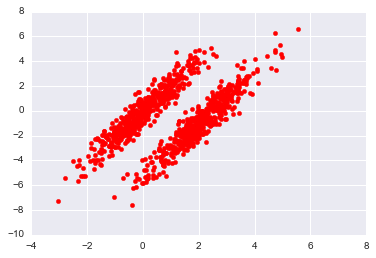

In [16]:
# Just keep this image as a sample

Более тонкая проблема возникает, когда центр тяжести облака точек находится не в нуле.

**Задание 3.5.** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}$$

Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек (кстати, вы можете глядя только на матрицу сказать, что это за направления?).

Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков. Убедитесь, что первый "новый признак" указывает куда-то в сторону центра тяжести эллипсоида, а второй и вовсе непонятно куда.

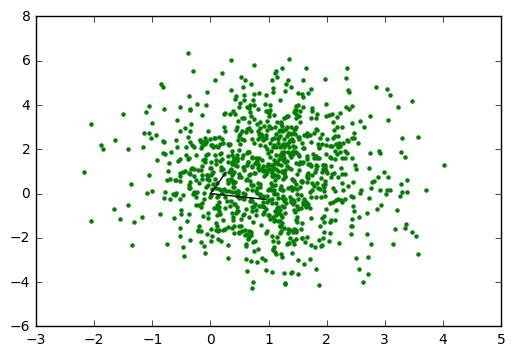

In [122]:
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=1000)
U, S, VT = svd(s, full_matrices=0)
plt.scatter(s[:,0], s[:,1], marker = '.', color='g')
plt.plot([0, VT.T[0,0]], [0, VT.T[1,0]], color='k')
plt.plot([0, VT.T[0,1]], [0, VT.T[1,1]], color='k')

Отсюда надо сделать

**Вывод:** перед тем, как использовать SVD в анализе данных зачастую полезным бывает добиться того, чтобы облако точек было центрировано в нуле. Для этого нужно из каждого признака вычесть его средние значения.

Именно эта проблема и попортила нам кровь во второй задаче, когда нам не получилось с первого раза красиво спроецировать MNIST!